In [4]:
import pandas as pd

Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [5]:
df_bikes = pd.read_csv("../data/city_bikes.csv")
df_bikes.drop("Unnamed: 0", axis=1, inplace=True)
df_bikes.head()

,latitude,longitude,free_bikes
0,23.249586,77.395599,2
1,23.222624,77.424051,5
2,23.192864,77.450197,4
3,23.203445,77.446469,6
4,23.200714,77.447472,3


In [6]:
df_fourSquare = pd.read_csv("../data/fourSquare.csv")
# df_fourSquare.drop("Unnamed: 0", axis=1, inplace=True)
df_fourSquare.head()

,Unnamed: 0,fsqid,name,latitude,longitude,category,popularity,price,rating,stats
0,0,2b35d1155b9e408487c4e75d,Sheetla Das Ki Bagiya Shri Ram,23.249586,77.395599,"Retail,",NaN,NaN,NaN,NaN
1,1,51336900e4b063789a511ca4,Pizza inn,23.249586,77.395599,"Fast Food Restaurant,",0.520196,1.0,NaN,NaN
2,2,51c4981d498ed8aad5ce9721,Danish Icecream Palour,23.249586,77.395599,"Ice Cream Parlor,",0.916330,1.0,NaN,NaN
3,3,5128b4fae4b01d5802641e46,Bake N Shake,23.249586,77.395599,"Coffee Shop,",0.764282,1.0,NaN,NaN
4,4,59f2ef646bd36b5ffe811366,Kamla Park,23.249586,77.395599,"Park,",0.931044,NaN,NaN,NaN


In [8]:
finalDf =  pd.merge(df_fourSquare,df_bikes, how='inner', left_on = ['latitude','longitude'], right_on = ['latitude','longitude'])

In [10]:
finalDf.drop('Unnamed: 0',axis=1,inplace=True)
finalDf

,fsqid,name,latitude,longitude,category,popularity,price,rating,stats,free_bikes
0,2b35d1155b9e408487c4e75d,Sheetla Das Ki Bagiya Shri Ram,23.249586,77.395599,"Retail,",NaN,NaN,NaN,NaN,2
1,51336900e4b063789a511ca4,Pizza inn,23.249586,77.395599,"Fast Food Restaurant,",0.520196,1.0,NaN,NaN,2
2,51c4981d498ed8aad5ce9721,Danish Icecream Palour,23.249586,77.395599,"Ice Cream Parlor,",0.916330,1.0,NaN,NaN,2
3,5128b4fae4b01d5802641e46,Bake N Shake,23.249586,77.395599,"Coffee Shop,",0.764282,1.0,NaN,NaN,2
4,59f2ef646bd36b5ffe811366,Kamla Park,23.249586,77.395599,"Park,",0.931044,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...
944,4d4ec8294f67224b0c406650,La Kuchina,23.233004,77.381998,"Restaurant,",0.965089,2.0,8.2,"{'total_photos': 9, 'total_ratings': 11, 'tota...",2
945,1bba98852baf4f71d857662e,Kerala Pramida,23.233004,77.381998,"Retail,",NaN,NaN,NaN,NaN,2
946,846508ad7644422d706110e2,Anu Vibhagiya Kendra,23.233004,77.381998,"Community and Government,",NaN,NaN,NaN,NaN,2
947,4de1511a63655ed7e3fb9c96,Manav Sangharalay/ Museum of Man,23.233004,77.381998,"Sculpture Garden,",0.922389,NaN,NaN,NaN,2


In [49]:
finalDf.to_csv("../data/finalDf.csv")

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [1]:
import matplotlib.pyplot as plt

In [39]:
temp = finalDf[["name","category","popularity","rating"]]

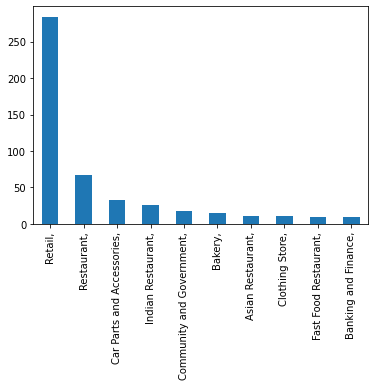

In [42]:
temp.drop_duplicates()['category'].value_counts()[:10].plot(kind='bar')
plt.show()

In [37]:
temp = finalDf[["name","category","popularity","rating"]]
temp.drop_duplicates().sort_values('popularity',ascending=False)[:10]

,name,category,popularity,rating
122,New Market,"Miscellaneous Store,",0.998269,6.5
171,10 Number Market,"Miscellaneous Store,",0.996538,7.3
588,"Panchwati Market, Saket Nagar","Shopping Mall,",0.996249,NaN
642,Bake N Shake Rangmahal Cineplex,"Burger Joint,",0.994518,6.2
89,D.B City Mall,"Department Store,",0.994230,8.1
61,Aashima Mall,"Plaza,",0.993364,7.0
83,6no Food Stall,"Food Court,",0.992787,NaN
440,Raju Tea Stall,"Tea Room,",0.990479,8.2
70,Hotel Rajhans Regency,"Asian Restaurant,",0.989325,NaN
274,Manohar Dairy and Restaurant,"Restaurant,",0.988748,7.3


In [38]:
temp = finalDf[["name","category","popularity","rating"]]
temp.drop_duplicates().sort_values('rating',ascending=False)[:10]

,name,category,popularity,rating
211,Jehan Numa Retreat,"Hotel,",0.942147,8.4
11,Amer Bakery Hut,"Bakery,",0.964512,8.3
153,La Kuchina,"Restaurant,",0.965089,8.2
440,Raju Tea Stall,"Tea Room,",0.990479,8.2
89,D.B City Mall,"Department Store,",0.994230,8.1
180,Hotel Jehanuma Palace,"Restaurant,",0.816792,8.1
85,10 Downing Street,"Indian Restaurant,",0.384593,8.0
155,Cafechino,"Café,",0.980381,8.0
120,Top N Town Main Icecream Joint,"Food Court,",0.986440,7.9
78,Bake 'n' Shake,"Bakery,Restaurant,",0.596365,7.8


# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [43]:
import sqlite3
database = "../data/benny.sqlite"
conn = sqlite3.connect(database)

In [44]:
df_bikes.to_sql(name='CityBikes', con=conn)
df_fourSquare.to_sql(name='FourSquare', con=conn)
conn.close()

In [45]:

con = sqlite3.connect("../data/benny.sqlite")
cur = con.cursor()

for row in cur.execute('SELECT * FROM CityBikes limit 5;'):
    print(row)

for row in cur.execute('SELECT * FROM FourSquare limit 5;'):
    print(row)

con.close()

(0, 23.249586, 77.395599, 2)
(1, 23.222624, 77.424051, 5)
(2, 23.192864, 77.450197, 4)
(3, 23.203445, 77.446469, 6)
(4, 23.200714, 77.447472, 3)
(0, 0, '2b35d1155b9e408487c4e75d', 'Sheetla Das Ki Bagiya Shri Ram', 23.249586, 77.395599, 'Retail,', None, None, None, None)
(1, 1, '51336900e4b063789a511ca4', 'Pizza inn', 23.249586, 77.395599, 'Fast Food Restaurant,', 0.520196191575303, 1.0, None, None)
(2, 2, '51c4981d498ed8aad5ce9721', 'Danish Icecream Palour', 23.249586, 77.395599, 'Ice Cream Parlor,', 0.9163300634737448, 1.0, None, None)
(3, 3, '5128b4fae4b01d5802641e46', 'Bake N Shake', 23.249586, 77.395599, 'Coffee Shop,', 0.7642815926139642, 1.0, None, None)
(4, 4, '59f2ef646bd36b5ffe811366', 'Kamla Park', 23.249586, 77.395599, 'Park,', 0.9310444316214656, None, None, None)


Look at the data before and after the join to validate your data.

In [46]:
df_bikes.head(5)

,latitude,longitude,free_bikes
0,23.249586,77.395599,2
1,23.222624,77.424051,5
2,23.192864,77.450197,4
3,23.203445,77.446469,6
4,23.200714,77.447472,3


In [47]:
df_fourSquare.head(5)

,Unnamed: 0,fsqid,name,latitude,longitude,category,popularity,price,rating,stats
0,0,2b35d1155b9e408487c4e75d,Sheetla Das Ki Bagiya Shri Ram,23.249586,77.395599,"Retail,",NaN,NaN,NaN,NaN
1,1,51336900e4b063789a511ca4,Pizza inn,23.249586,77.395599,"Fast Food Restaurant,",0.520196,1.0,NaN,NaN
2,2,51c4981d498ed8aad5ce9721,Danish Icecream Palour,23.249586,77.395599,"Ice Cream Parlor,",0.916330,1.0,NaN,NaN
3,3,5128b4fae4b01d5802641e46,Bake N Shake,23.249586,77.395599,"Coffee Shop,",0.764282,1.0,NaN,NaN
4,4,59f2ef646bd36b5ffe811366,Kamla Park,23.249586,77.395599,"Park,",0.931044,NaN,NaN,NaN


In [48]:
finalDf.head(5)

,fsqid,name,latitude,longitude,category,popularity,price,rating,stats,free_bikes
0,2b35d1155b9e408487c4e75d,Sheetla Das Ki Bagiya Shri Ram,23.249586,77.395599,"Retail,",NaN,NaN,NaN,NaN,2
1,51336900e4b063789a511ca4,Pizza inn,23.249586,77.395599,"Fast Food Restaurant,",0.520196,1.0,NaN,NaN,2
2,51c4981d498ed8aad5ce9721,Danish Icecream Palour,23.249586,77.395599,"Ice Cream Parlor,",0.916330,1.0,NaN,NaN,2
3,5128b4fae4b01d5802641e46,Bake N Shake,23.249586,77.395599,"Coffee Shop,",0.764282,1.0,NaN,NaN,2
4,59f2ef646bd36b5ffe811366,Kamla Park,23.249586,77.395599,"Park,",0.931044,NaN,NaN,NaN,2
